<a href="https://colab.research.google.com/github/NOTGOD6000/Exploratory-Data-Analysis-on-Heart-Disease-Dataset/blob/main/Exploratory%20Data%20Analysis%20on%20Heart%20Disease%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **EXPLORATORY DATA ANALYSIS IN PYTHON**



**What is Exploratory Data Analysis ?**

 Exploratory Data Analysis (EDA) is the process of examining and summarizing a dataset to understand its characteristics, identify patterns, and make informed decisions. It involves calculating summary statistics, visualizing data through plots and charts, identifying missing or inconsistent data, and exploring relationships between variables. EDA provides insights that guide further analysis and decision-making.

 EDA helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.

#Topic:-

#📊 Exploratory Data Analysis on Heart Disease Dataset

In this notebook, we perform an Exploratory Data Analysis (EDA) on the UCI Heart Disease dataset (Cleveland subset). The objective is to understand the structure of the data, identify trends, and gain insights that could be useful for building a predictive model.

📌 Dataset Description

  1. The dataset contains 14 attributes related to patient medical history and diagnostic results.

  2. The target variable indicates the presence (1) or absence (0) of heart disease.

  3. We use the processed Cleveland dataset which is a cleaned and widely used version.

Attributes include:

  1. Demographics: age, sex

  2. Medical attributes: chest pain type (cp), resting blood pressure (trestbps), cholesterol, fasting blood sugar (fbs), etc.

  3. Results from diagnostic tests: resting ECG (restecg), max heart rate (thalach), ST depression (oldpeak), etc.

  4. Target: 0 (no disease), 1 (disease present)

## 📥 Dataset Overview

The dataset contains 14 attributes related to patient medical history and diagnostic results:

- **age**: Age of the patient
- **sex**: Sex of the patient (1 = male, 0 = female)
- **cp**: Chest pain type (1–4)
- **trestbps**: Resting blood pressure (in mm Hg)
- **chol**: Serum cholesterol in mg/dl
- **fbs**: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)
- **restecg**: Resting electrocardiographic results (0–2)
- **thalach**: Maximum heart rate achieved
- **exang**: Exercise induced angina (1 = yes, 0 = no)
- **oldpeak**: ST depression induced by exercise relative to rest
- **slope**: Slope of the peak exercise ST segment (0–2)
- **ca**: Number of major vessels colored by fluoroscopy (0–3)
- **thal**: Thalassemia (3 = normal; 6 = fixed defect; 7 = reversible defect)
- **target**: Diagnosis of heart disease (1 = presence, 0 = absence)


#Importing the required libraries for EDA

Below are the libraries that are used in order to perform EDA (Exploratory data analysis)

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Loading the data into dataframes

🧹 Data Cleaning

We began by:

  Replacing '?' with NaN.

  Dropping rows with missing values.

  Converting columns 'ca' and 'thal' to numeric data types.

  Binarizing the target column: values > 0 → 1 (presence of disease).

This ensured our dataset was clean and ready for analysis.

In [42]:
# Load dataset
columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]
df = pd.read_csv("processed.cleveland.data", names=columns)

# Check for missing values
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


After identifying missing values, we proceed to clean the data.

In [43]:
# Replace '?' with NaN
df.replace("?", pd.NA, inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

# Convert 'ca' and 'thal' to numeric
df["ca"] = pd.to_numeric(df["ca"])
df["thal"] = pd.to_numeric(df["thal"])

# Convert 'target' to binary classification
df["target"] = df["target"].apply(lambda x: 1 if x > 0 else 0)

# Check data types
df.dtypes


,0
age,float64
sex,float64
cp,float64
trestbps,float64
chol,float64
fbs,float64
restecg,float64
thalach,float64
exang,float64
oldpeak,float64


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  target    297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 34.8 KB


In [32]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


📊 Summary Statistics

We examine the summary statistics of the dataset to understand the distribution of numerical features.
This will provide insights into:

  Mean: The average value of each feature.

  Standard Deviation: The measure of the spread of the data.

   Min/Max: The range of values for each feature.

   Percentiles: The distribution of the data at various intervals.

In [44]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [52]:
df["target"].value_counts()
#0 no heart disease



,count
target,
0,160
1,137


#Data visualization

# 1.Correlation map

We examine the correlation between features to identify potential relationships.

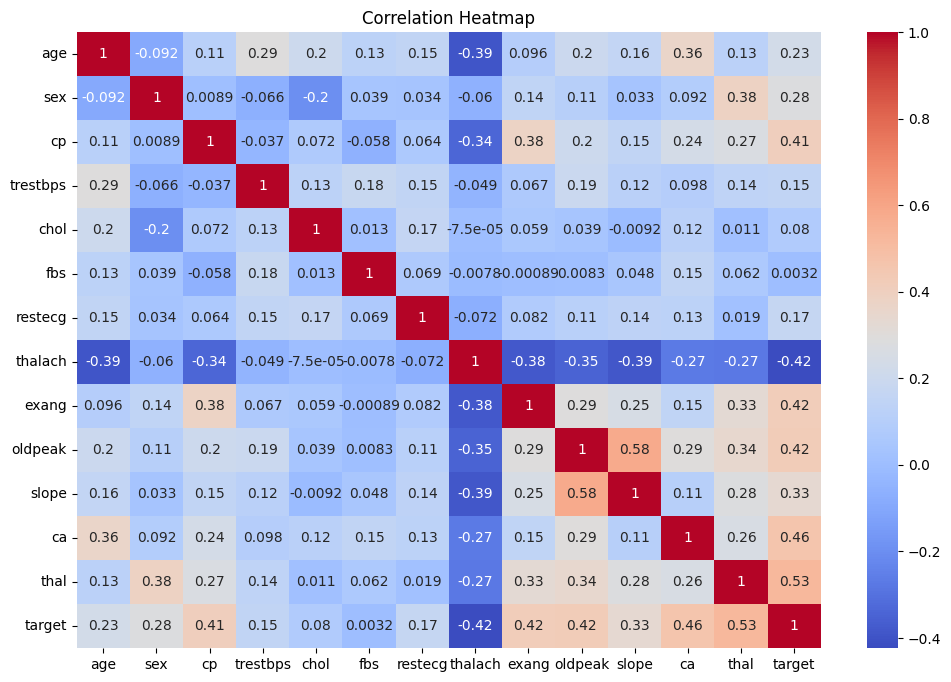

In [51]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


The heatmap displays the correlation coefficients between pairs of features. Strong correlations (close to 1 or -1) suggest that the features move together, while weak correlations (close to 0) indicate little to no linear relationship.

# 2. Count Plot for Target

🎯 Target Variable Distribution

We visualize the distribution of the target variable to understand the balance between the two class

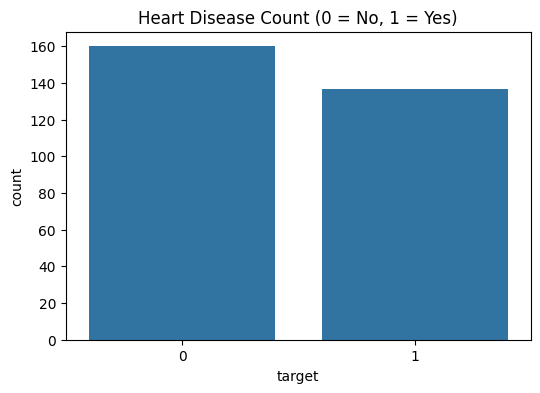

In [48]:
plt.figure(figsize=(6, 4))
sns.countplot(x="target", data=df)
plt.title("Heart Disease Count (0 = No, 1 = Yes)")
plt.show()

This bar plot shows the number of instances with and without heart disease. A balanced distribution indicates that the dataset is suitable for training machine learning models without bias towards one class.

# 3. Distribution of Age

🔍 Feature Distribution by Target

We explore how various features differ between patients with and without heart disease

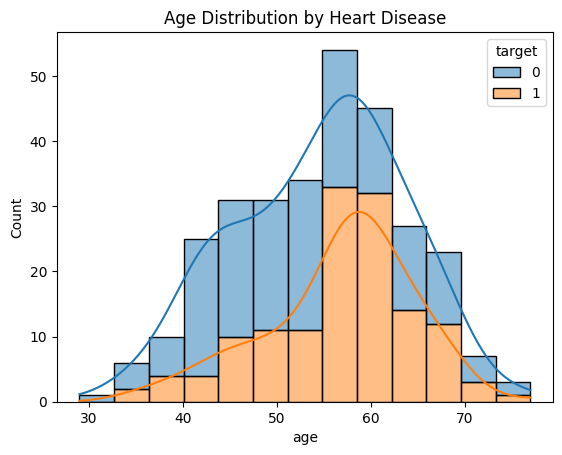

In [50]:
sns.histplot(data=df, x="age", hue="target", kde=True, multiple="stack")
plt.title("Age Distribution by Heart Disease")
plt.show()


This histogram displays the age distribution for both classes. By observing the peaks and spread, we can infer age-related trends in heart disease prevalence.

# Class vs Features

Compare Cholesterol by Target

Detecting Outliers

❓ What is an Outlier? An outlier is a data point that is significantly different from the rest of the data.

It "lies outside" the normal pattern — either much higher or lower than most other values.

📊 Simple Example: Imagine this list of tumor sizes:

csharp Copy Edit [11, 12, 10, 13, 12, 95] Most values are around 10–13

The value 95 is an outlier — it's way bigger than the rest


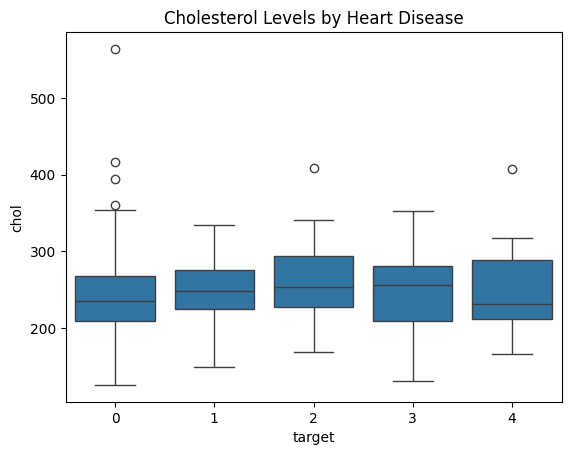

In [38]:
sns.boxplot(x="target", y="chol", data=df)
plt.title("Cholesterol Levels by Heart Disease")
plt.show()


This box plot compares cholesterol levels between the two groups. Elevated cholesterol levels in the disease group might indicate a risk factor for heart disease.

# Compare Maximum Heart Rate

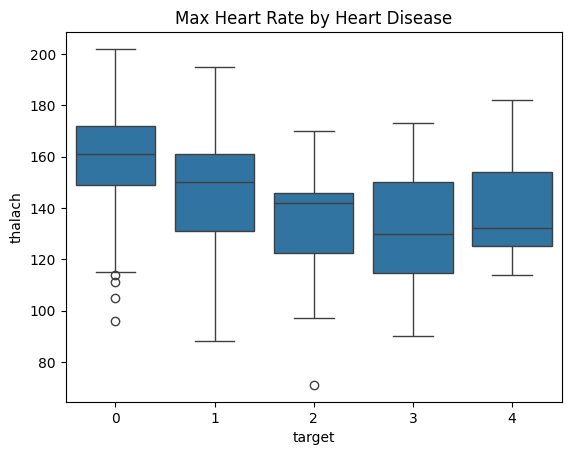

In [39]:
sns.boxplot(x="target", y="thalach", data=df)
plt.title("Max Heart Rate by Heart Disease")
plt.show()


The box plot illustrates the distribution of maximum heart rate achieved during exercise for both classes. A higher median and less variability in the non-disease group may suggest better cardiovascular health.

# Chest Pain Type

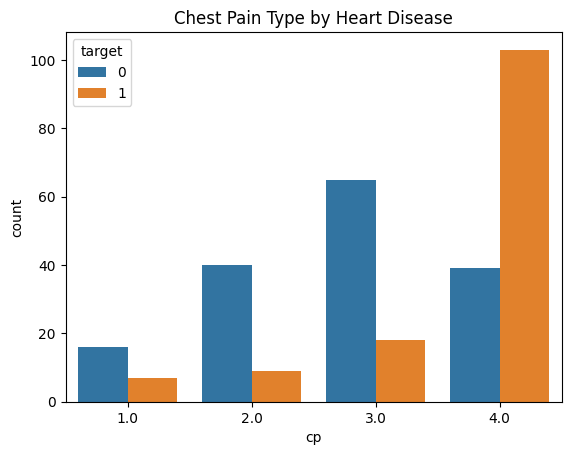

In [53]:
sns.countplot(x="cp", hue="target", data=df)
plt.title("Chest Pain Type by Heart Disease")
plt.show()


The count plot shows the frequency of different chest pain types across the two classes. Certain types may be more prevalent in patients with heart disease.